In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('QueryResults.csv', parse_dates=['CreationDate'])

In [3]:
df.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,65671,1,2019-12-31 18:08:12,1,62,<deep-learning><hyperparameter><hyperparameter...,0,1.0
1,65667,1,2019-12-31 16:08:06,1,27,<bayesian>,0,NaN
2,65666,1,2019-12-31 14:59:18,1,120,<scikit-learn><cross-validation><ml>,1,NaN
3,65664,1,2019-12-31 14:15:54,1,571,<neural-network><deep-learning><classification...,0,NaN
4,65663,1,2019-12-31 13:25:01,3,48,<information-retrieval>,1,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8159 entries, 0 to 8158
Data columns (total 8 columns):
Id               8159 non-null int64
PostTypeId       8159 non-null int64
CreationDate     8159 non-null datetime64[ns]
Score            8159 non-null int64
ViewCount        8159 non-null int64
Tags             8159 non-null object
AnswerCount      8159 non-null int64
FavoriteCount    1506 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 510.1+ KB


In [5]:
df.describe()

,Id,PostTypeId,Score,ViewCount,AnswerCount,FavoriteCount
count,8159.000000,8159.0,8159.000000,8159.000000,8159.000000,1506.000000
mean,55140.033950,1.0,1.058831,362.494914,0.898517,1.278220
std,6482.592776,0.0,1.648053,1721.429128,0.880168,1.160944
min,43363.000000,1.0,-2.000000,2.000000,0.000000,0.000000
25%,49245.000000,1.0,0.000000,31.000000,0.000000,1.000000
50%,55471.000000,1.0,1.000000,64.000000,1.000000,1.000000
75%,61018.000000,1.0,1.000000,207.000000,1.000000,1.000000
max,65671.000000,1.0,45.000000,80487.000000,9.000000,16.000000


In [6]:
df['FavoriteCount'].value_counts(dropna=False)

NaN     6653
1.0      993
2.0      235
0.0      172
3.0       54
4.0       23
6.0       12
5.0        7
12.0       3
7.0        2
8.0        2
16.0       1
10.0       1
9.0        1
Name: FavoriteCount, dtype: int64

The only column with missing data is 'FavoriteCount', but it is missing a lot of its data. This appears to just be a case of nan standing in for 0, so we can just replace all our nans in this column with 0s.

In [7]:
df.fillna(0, inplace=True)

In [8]:
df['FavoriteCount'].value_counts(dropna=False)

0.0     6825
1.0      993
2.0      235
3.0       54
4.0       23
6.0       12
5.0        7
12.0       3
7.0        2
8.0        2
16.0       1
10.0       1
9.0        1
Name: FavoriteCount, dtype: int64

Since I parsed 'CreationDate' when I read in the csv, each column is already of the correct dtype, with the arguable exception of 'FavoriteCount'. However, 'Tags' could be parsed into a list of tags.

In [9]:
df['Tags'] = df['Tags'].str.replace('><', ',').str.replace('[><]','').str.split(',')

In [10]:
tag_list = []
for row in df['Tags']:
    for item in row:
        tag_list.append(item)
tag_series = pd.Series(tag_list)
tag_names = tag_series.unique()

In [11]:
print('Top Ten Tags by Frequency:')
tag_freq = tag_series.value_counts()
tag_freq.head(10)

Top Ten Tags by Frequency:


machine-learning    2513
python              1690
deep-learning       1124
neural-network       986
keras                862
classification       641
tensorflow           535
scikit-learn         497
nlp                  459
cnn                  451
dtype: int64

In [12]:
for name in tag_names:
    df[name] = df['Tags'].apply(lambda x: True if name in x else False)

In [13]:
df = df.drop('Tags', axis=1)

In [14]:
tag_views={}
for name in tag_names:
    tag_views[name] = df[df[name]==True]['ViewCount'].sum()
tag_views = pd.Series(tag_views)

In [15]:
print('Top Ten Tags by View Count:')
tag_views = tag_views.sort_values(ascending=False)
tag_views.head(10)

Top Ten Tags by View Count:


python              1108192
machine-learning     722008
keras                506055
pandas               483435
deep-learning        423669
neural-network       347792
scikit-learn         259652
tensorflow           239821
classification       193855
dataframe            188456
dtype: int64

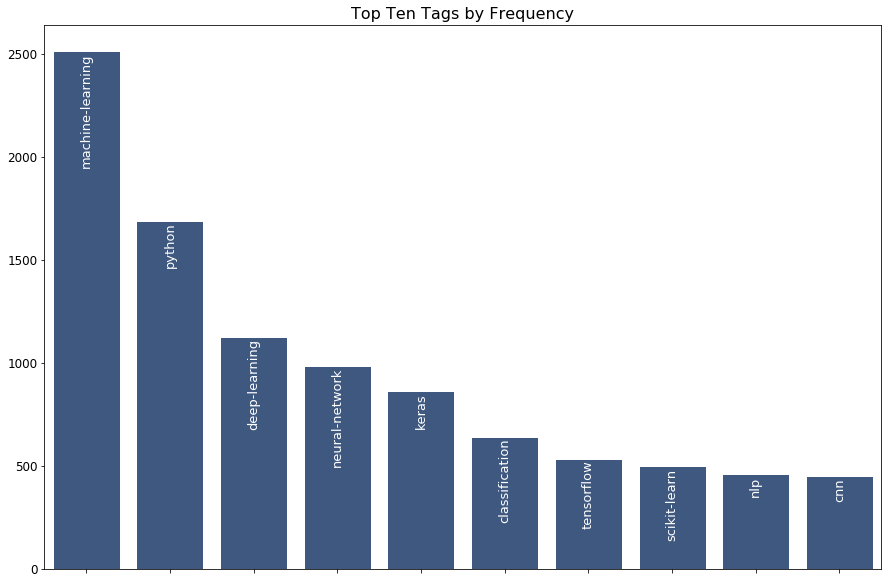

In [16]:
plt.figure(figsize=(15,10))
ax = plt.gca()
sns.set(style='whitegrid')
sns.barplot(x=tag_freq.head(10).index, y=tag_freq.head(10), color='#34558B')
ax.set_xticklabels('')
plt.title('Top Ten Tags by Frequency', fontsize=16)
plt.tick_params(axis='y', labelsize=12)
for i in range(0,10):
    plt.annotate(tag_freq.head(10).index[i], (i, tag_freq.head(10)[i]-10), rotation=90, ha='center', va='top', color='white', size=13)

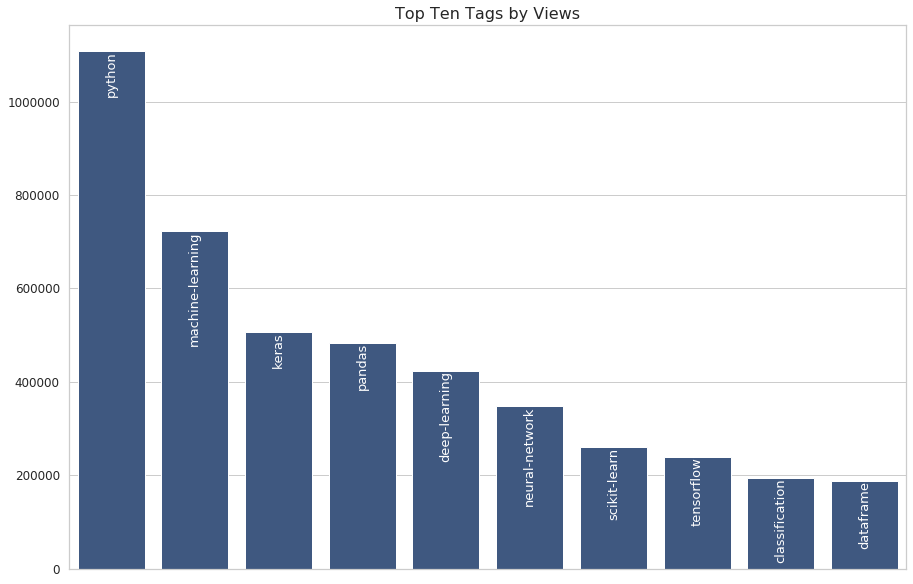

In [17]:
plt.figure(figsize=(15,10))
ax = plt.gca()
sns.set(style='whitegrid')
sns.barplot(x=tag_views.head(10).index, y=tag_views.head(10), color='#34558B')
ax.set_xticklabels('')
plt.title('Top Ten Tags by Views', fontsize=16)
plt.tick_params(axis='y', labelsize=12)
for i in range(0,10):
    plt.annotate(tag_views.head(10).index[i], (i, tag_views.head(10)[i]-50), rotation=90, ha='center', va='top', color='white', size=13)

In [18]:
tag_favorites={}
for name in tag_names:
    tag_favorites[name] = df[df[name]==True]['FavoriteCount'].sum()
tag_favorites = pd.Series(tag_favorites)

In [19]:
print("Top Ten Tags By Favorites:")
tag_favorites.sort_values(ascending=False).head(10)

Top Ten Tags By Favorites:


machine-learning    648.0
python              392.0
deep-learning       317.0
neural-network      260.0
keras               223.0
classification      172.0
scikit-learn        135.0
nlp                 117.0
cnn                 113.0
tensorflow          106.0
dtype: float64

In [20]:
tag_corrs = df.iloc[:,7:].corr()
print('Strong Tag Correlations:')
for col in tag_corrs.columns:
    for cell in tag_corrs.loc[:,col]:
        if ((cell >= .5) or (cell <= -.5)) and cell != 1:
            row = tag_corrs[tag_corrs[col]==cell]
            print (cell, col, row.index.values)

Strong Tag Correlations:
0.5339648885704114 aws ['sagemaker']
0.5036730576655987 orange ['orange3']
0.5772794937963728 categorical-encoding ['helmert-coding' 'james-stein-encoder']
0.5772794937963728 categorical-encoding ['helmert-coding' 'james-stein-encoder']
0.5339648885704114 sagemaker ['aws']
0.7070634416150764 pearsons-correlation-coefficient ['spearmans-rank-correlation' 'kendalls-tau-coefficient']
0.7070634416150764 pearsons-correlation-coefficient ['spearmans-rank-correlation' 'kendalls-tau-coefficient']
0.7070634416150764 spearmans-rank-correlation ['pearsons-correlation-coefficient']
0.7070634416150764 kendalls-tau-coefficient ['pearsons-correlation-coefficient']
0.5772794937963728 helmert-coding ['categorical-encoding']
0.5772794937963728 james-stein-encoder ['categorical-encoding']
0.5474874618140344 fuzzy-logic ['fuzzy-classification']
0.5036730576655987 orange3 ['orange']
0.5474874618140344 fuzzy-classification ['fuzzy-logic']
0.5772794937963471 crawling ['open-source']


In [21]:
df2 = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])

In [22]:
df2['Tags'] = df2['Tags'].str.replace('><', ',').str.replace('[><]','').str.split(',')

In [23]:
tag_list2 = []
for row in df2['Tags']:
    for item in row:
        tag_list2.append(item)
tag_series2 = pd.Series(tag_list2)
tag_names2 = tag_series2.unique()

In [24]:
for name in tag_names2:
    df2[name] = df2['Tags'].apply(lambda x: 1 if name in x else 0)
df2 = df2.drop(['Id','Tags'], axis=1)

In [25]:
df2['CreationDate'] = df2['CreationDate'].astype(str)

In [26]:
df2['yearmonth'] = df2['CreationDate'].str.extract(r'([\d]{4}-[\d]{2})')

In [27]:
df2['yearmonth'] = df2['yearmonth'].str.replace('-','').astype(int)

In [28]:
tags_by_ym = df2.groupby('yearmonth').sum().sum(axis=1)

In [38]:
df2.corr()['deep-learning'].sort_values(ascending=False)

deep-learning     1.000000
neural-network    0.221682
keras             0.150520
cnn               0.146903
tensorflow        0.129639
                    ...   
python           -0.065688
clustering       -0.071276
pandas           -0.072627
r                -0.081532
scikit-learn     -0.085094
Name: deep-learning, Length: 594, dtype: float64

In [39]:
deep_learning = df2[['yearmonth', 'deep-learning', 'neural-network', 'keras', 'cnn', 'tensorflow']]

In [40]:
dl_tags_by_ym = deep_learning.groupby('yearmonth').sum().sum(axis=1)

In [41]:
percent_dl_tags_by_ym = ((dl_tags_by_ym/tags_by_ym)*100)

[Text(0, 0, '201405'),
 Text(0, 0, '201406'),
 Text(0, 0, '201407'),
 Text(0, 0, '201408'),
 Text(0, 0, '201409'),
 Text(0, 0, '201410'),
 Text(0, 0, '201411'),
 Text(0, 0, '201412'),
 Text(0, 0, '201501'),
 Text(0, 0, '201502'),
 Text(0, 0, '201503'),
 Text(0, 0, '201504'),
 Text(0, 0, '201505'),
 Text(0, 0, '201506'),
 Text(0, 0, '201507'),
 Text(0, 0, '201508'),
 Text(0, 0, '201509'),
 Text(0, 0, '201510'),
 Text(0, 0, '201511'),
 Text(0, 0, '201512'),
 Text(0, 0, '201601'),
 Text(0, 0, '201602'),
 Text(0, 0, '201603'),
 Text(0, 0, '201604'),
 Text(0, 0, '201605'),
 Text(0, 0, '201606'),
 Text(0, 0, '201607'),
 Text(0, 0, '201608'),
 Text(0, 0, '201609'),
 Text(0, 0, '201610'),
 Text(0, 0, '201611'),
 Text(0, 0, '201612'),
 Text(0, 0, '201701'),
 Text(0, 0, '201702'),
 Text(0, 0, '201703'),
 Text(0, 0, '201704'),
 Text(0, 0, '201705'),
 Text(0, 0, '201706'),
 Text(0, 0, '201707'),
 Text(0, 0, '201708'),
 Text(0, 0, '201709'),
 Text(0, 0, '201710'),
 Text(0, 0, '201711'),
 Text(0, 0,

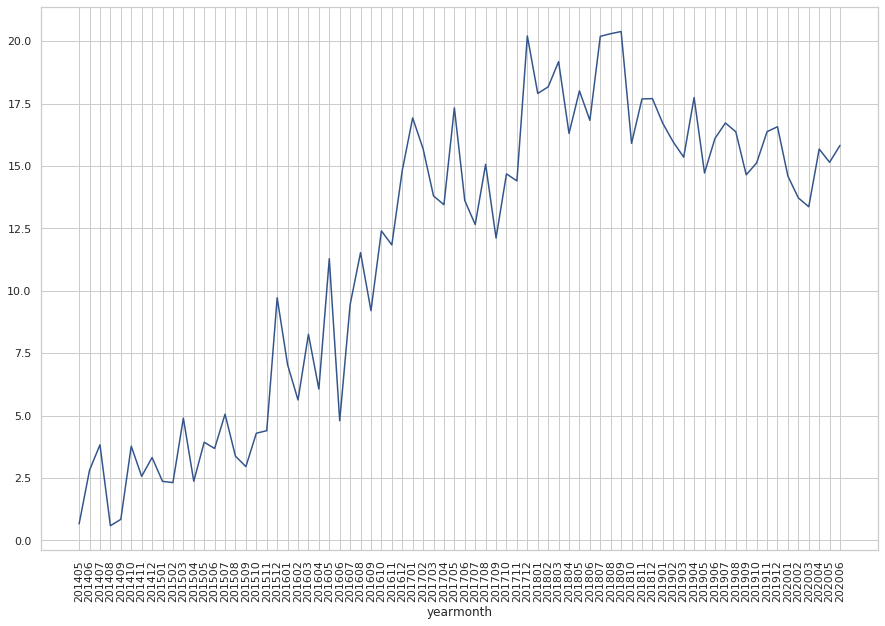

In [42]:
plt.figure(figsize=(15,10))
ax = plt.gca()
sns.set(style='whitegrid')
sns.lineplot(x=percent_dl_tags_by_ym.index.astype(str), y=percent_dl_tags_by_ym, color='#34558B')
ax.set_xticklabels(labels = percent_dl_tags_by_ym.index.astype(str), rotation=90)

As a percentage of total tags used, the top 5 tags associated with deep-learning have plateaued in terms of frequency of use over the last couple of years. Usage of deep-learning-associated tags peaked in mid-2018, and since that time there has been slow decline in their usage. To stay current, I would actually not recommend deep-learning as a topic, especially since data science is such a quickly evolving field. So what are some tags that have gained in popularity over the last couple of years? 

In [58]:
last_2_yrs = df2.groupby('yearmonth').sum().loc['201805':'202005']

In [100]:
last_2_yrs_percents = last_2_yrs.apply(lambda row: (row/last_2_yrs.sum(axis=1)*100))
last_2_yrs_percents

,data,stata,machine-learning,time-series,neural-network,keras,tensorflow,image-classification,convnet,transfer-learning,...,igraph,ngboost,handwritten,field-aware-factorization-machines,hashing-trick,or-tools,linear-programming,target-encoding,summarunner-architecture,parametric
yearmonth,,,,,,,,,,,,,,,,,,,,,
201805,0.815851,0.000000,10.314685,1.340326,5.186480,3.205128,2.505828,1.048951,0.641026,0.349650,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
201806,0.483092,0.080515,10.547504,1.529791,5.314010,2.979066,2.254428,0.805153,0.644122,0.080515,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
201807,0.755495,0.000000,11.950549,1.510989,5.288462,3.090659,2.747253,0.686813,0.961538,0.206044,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
201808,0.904977,0.000000,12.281836,1.357466,6.787330,3.619910,2.456367,0.452489,0.387847,0.129282,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
201809,0.860357,0.000000,10.655195,1.720715,6.287227,4.235606,2.713435,1.125083,1.720715,0.066181,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
201810,0.844476,0.000000,10.837438,1.477833,4.714989,3.166784,2.040816,0.703730,0.774103,0.070373,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
201811,0.547731,0.000000,10.563380,1.408451,5.712050,3.521127,2.269171,0.704225,0.625978,0.156495,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
201812,0.905350,0.000000,10.370370,1.893004,5.925926,3.292181,1.975309,1.069959,0.411523,0.246914,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
201901,0.935925,0.000000,11.591073,1.727862,4.967603,3.311735,2.519798,1.151908,0.791937,0.143988,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [118]:
past_year = last_2_yrs_percents.iloc[-12:]
two_yrs_ago = last_2_yrs_percents.iloc[1:13]
trending_tags = ((past_year.mean() - two_yrs_ago.mean())*100).sort_values(ascending=False).head()
trending_tags_df = last_2_yrs_percents[trending_tags.index]

In [119]:
trending_tags_df.index = trending_tags_df.index.astype(str)
trending_tags_df

,nlp,pytorch,python-3.x,bert,image-preprocessing
yearmonth,,,,,
201805,1.748252,0.233100,0.000000,0.000000,0.000000
201806,1.771337,0.241546,0.000000,0.000000,0.000000
201807,1.373626,0.274725,0.000000,0.000000,0.000000
201808,1.745314,0.323206,0.000000,0.000000,0.000000
201809,1.455989,0.198544,0.000000,0.000000,0.000000
201810,1.407460,0.351865,0.000000,0.000000,0.000000
201811,1.330203,0.312989,0.000000,0.000000,0.000000
201812,0.987654,0.493827,0.000000,0.000000,0.000000
201901,1.943844,0.503960,0.000000,0.000000,0.143988


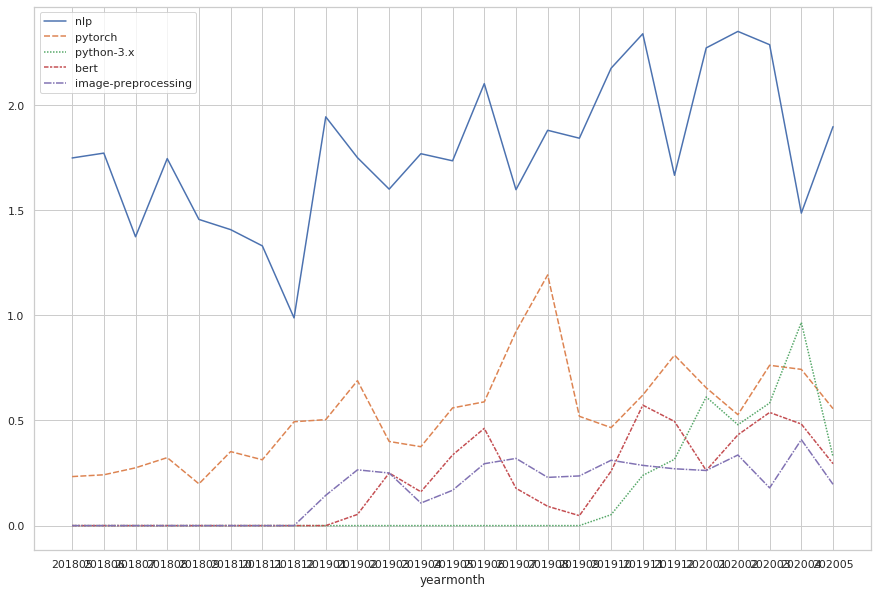

In [120]:
plt.figure(figsize=(15,10))
ax = plt.gca()
sns.set(style='whitegrid')
sns.lineplot(data=trending_tags_df)